In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel('dtset.xlsx', sheet_name='filled_data')
df.head()

,bank,quarterly,year,time,NPL,IR,GDP,IIP,INF,CPI,UN,M2,PCR,LTA,ROA,ROE,LDR
0,ABB,1,2012,2012q1,0.0325,0.138700,0.0464,0.0650,0.08,0.1415,0.0222,0.142546,0.0160,0.499451,0.00740,0.065500,0.705935
1,ABB,2,2012,2012q2,0.0325,0.113667,0.0480,0.0802,0.05,0.0690,0.0218,0.142546,0.0153,0.399700,0.00639,0.072606,0.547300
2,ABB,3,2012,2012q3,0.0325,0.092067,0.0505,0.0965,0.04,0.0648,0.0229,0.142546,0.0160,0.499451,0.00740,0.065500,0.705935
3,ABB,4,2012,2012q4,0.0290,0.093667,0.0544,0.0593,0.04,0.0681,0.0212,0.142546,0.0221,0.398600,0.00910,0.083000,0.504700
4,ABB,1,2013,2013q1,0.0325,0.090000,0.0476,0.0516,0.04,0.0664,0.0227,0.142546,0.0221,0.407600,0.00880,0.083000,1.614000


In [3]:
df['time'] = pd.to_datetime(df['year'].astype(str) + '-' + (df['quarterly'] * 3).astype(str) + '-01')
df.set_index(['bank', 'time'], inplace=True)

df.head()

quarterly  year     NPL        IR     GDP     IIP   INF  \
bank time                                                                  
ABB  2012-03-01          1  2012  0.0325  0.138700  0.0464  0.0650  0.08   
     2012-06-01          2  2012  0.0325  0.113667  0.0480  0.0802  0.05   
     2012-09-01          3  2012  0.0325  0.092067  0.0505  0.0965  0.04   
     2012-12-01          4  2012  0.0290  0.093667  0.0544  0.0593  0.04   
     2013-03-01          1  2013  0.0325  0.090000  0.0476  0.0516  0.04   

                    CPI      UN        M2     PCR       LTA      ROA  \
bank time                                                              
ABB  2012-03-01  0.1415  0.0222  0.142546  0.0160  0.499451  0.00740   
     2012-06-01  0.0690  0.0218  0.142546  0.0153  0.399700  0.00639   
     2012-09-01  0.0648  0.0229  0.142546  0.0160  0.499451  0.00740   
     2012-12-01  0.0681  0.0212  0.142546  0.0221  0.398600  0.00910   
     2013-03-01  0.0664  0.0227  0.142546  0.0221  0.407600  0.00880   

                      ROE       LDR  
bank time                            
ABB  2012-03-01  0.065500  0.705935  
     2012-06-01  0.072606  0.547300  
     2012-09-01  0.065500  0.705935  
     2012-12-01  0.083000  0.504700  
     2013-03-01  0.083000  1.614000

### Distribution

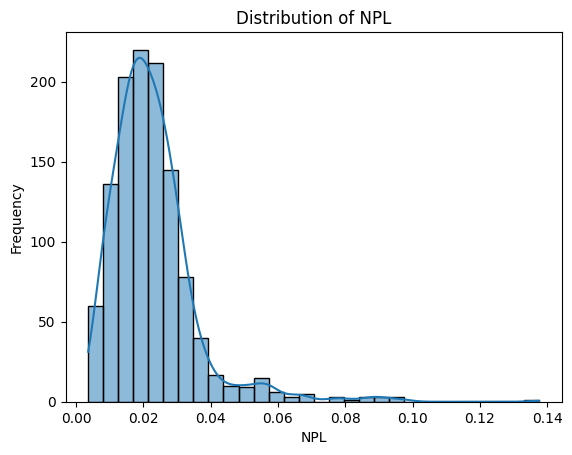

In [4]:
sns.histplot(df['NPL'], kde=True, bins=30)
plt.title("Distribution of NPL")
plt.xlabel("NPL")
plt.ylabel("Frequency")
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_11496\2056455645.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df.index.get_level_values(0), y='NPL', data=df.reset_index(), palette='coolwarm')


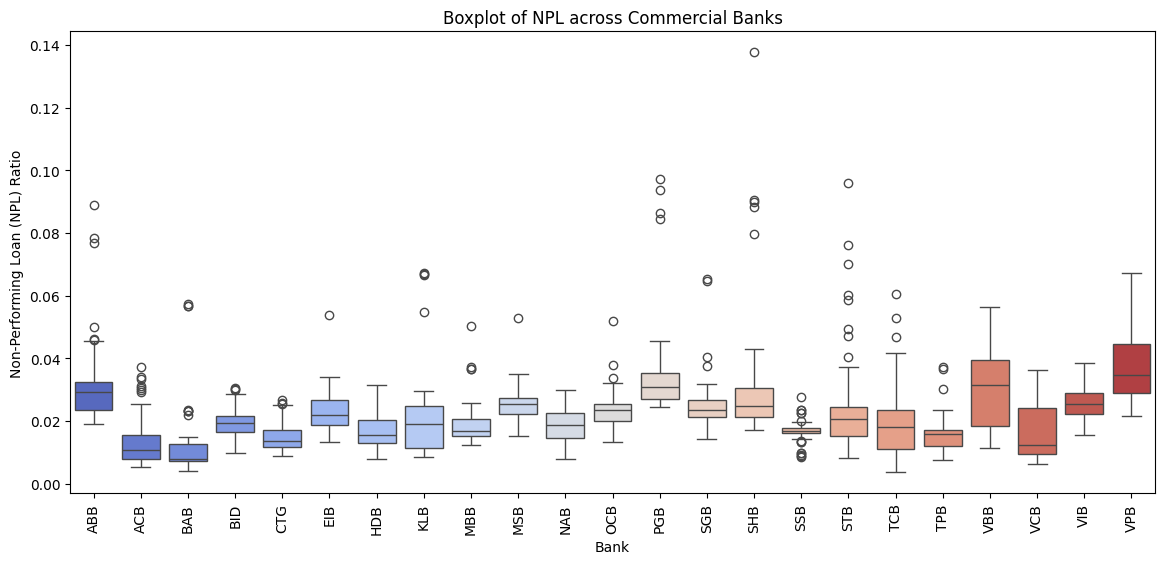

In [5]:
plt.figure(figsize=(14, 6))
sns.boxplot(x=df.index.get_level_values(0), y='NPL', data=df.reset_index(), palette='coolwarm')
plt.xticks(rotation=90)
plt.title("Boxplot of NPL across Commercial Banks")
plt.xlabel("Bank")
plt.ylabel("Non-Performing Loan (NPL) Ratio")
plt.show()

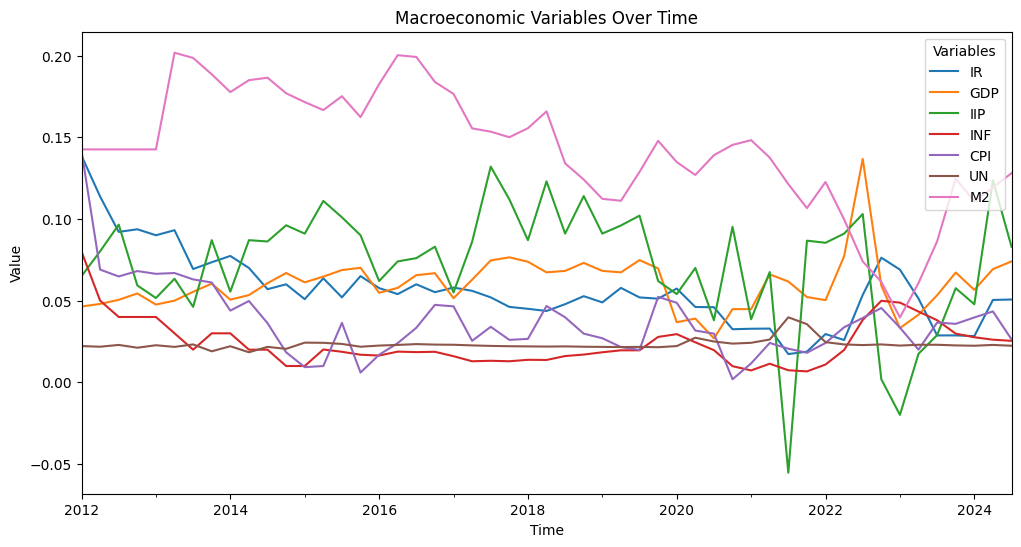

In [6]:
macro_vars = ['IR', 'GDP', 'IIP', 'INF', 'CPI', 'UN', 'M2']
avg_macro = df.groupby('time')[macro_vars].mean()

avg_macro.plot(figsize=(12, 6), title="Macroeconomic Variables Over Time")
plt.ylabel("Value")
plt.xlabel("Time")
plt.legend(title="Variables")
plt.show()



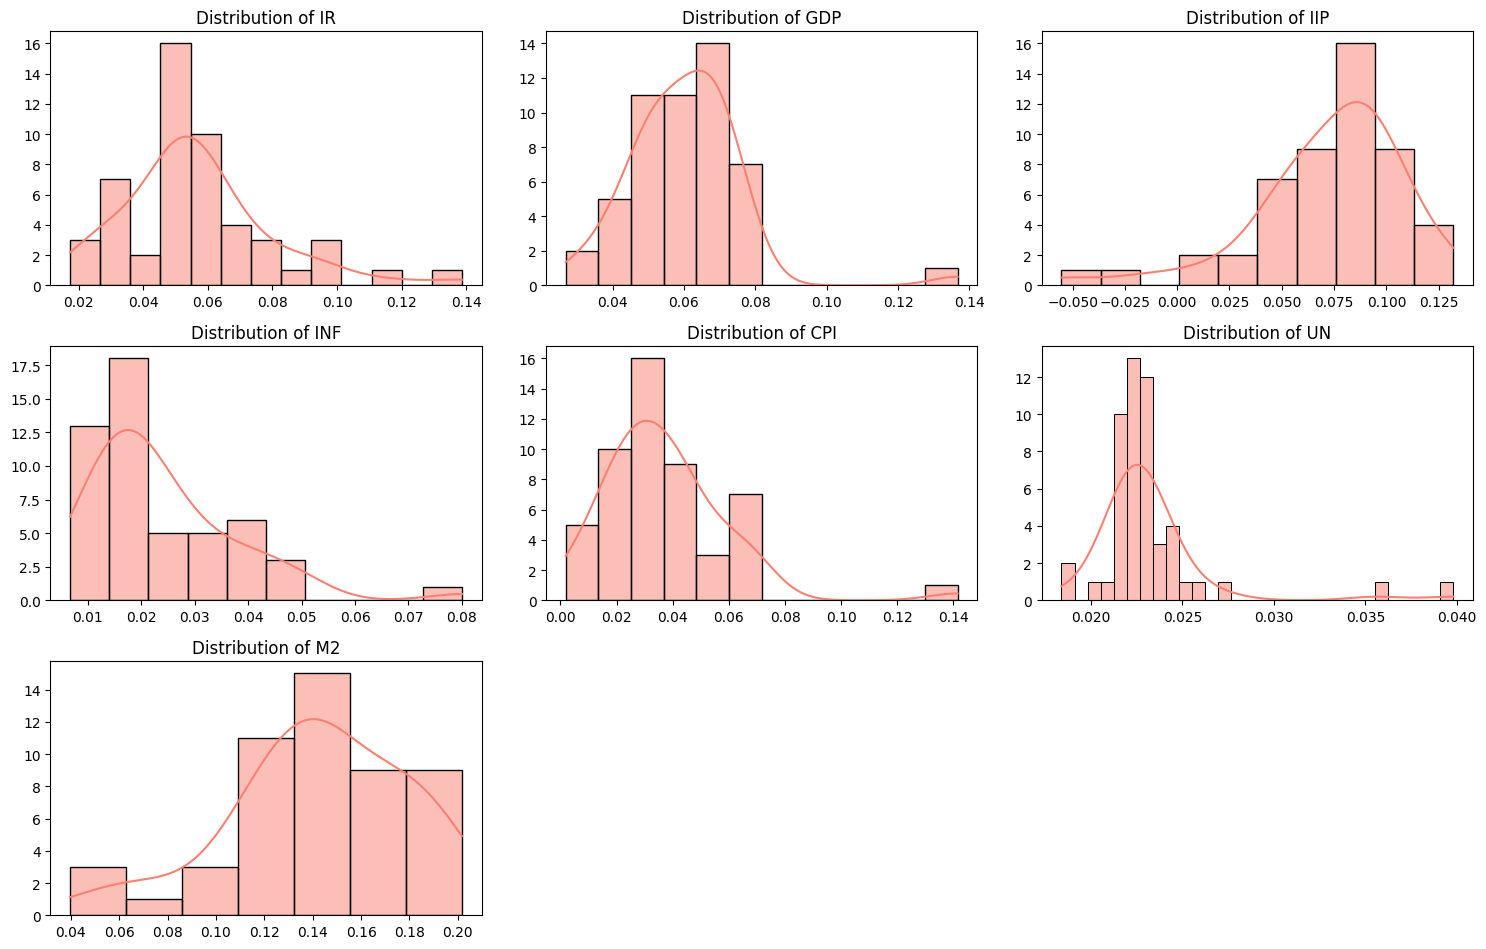

In [7]:
# Macroeconomic variables
macro_vars = ['IR', 'GDP', 'IIP', 'INF', 'CPI', 'UN', 'M2']

# Keep only one row per time point to avoid duplication
macro_df = df.reset_index().drop_duplicates(subset='time').set_index('time')

# Plot histogram + KDE for macro variables
fig, axs = plt.subplots(3, 3, figsize=(15, 10))
axs = axs.flatten()

for i, feature in enumerate(macro_vars):
    sns.histplot(macro_df[feature], kde=True, ax=axs[i], color='salmon')
    axs[i].set_title(f"Distribution of {feature}")
    axs[i].set_xlabel("")
    axs[i].set_ylabel("")

# Hide any unused subplots
for j in range(len(macro_vars), len(axs)):
    axs[j].set_visible(False)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

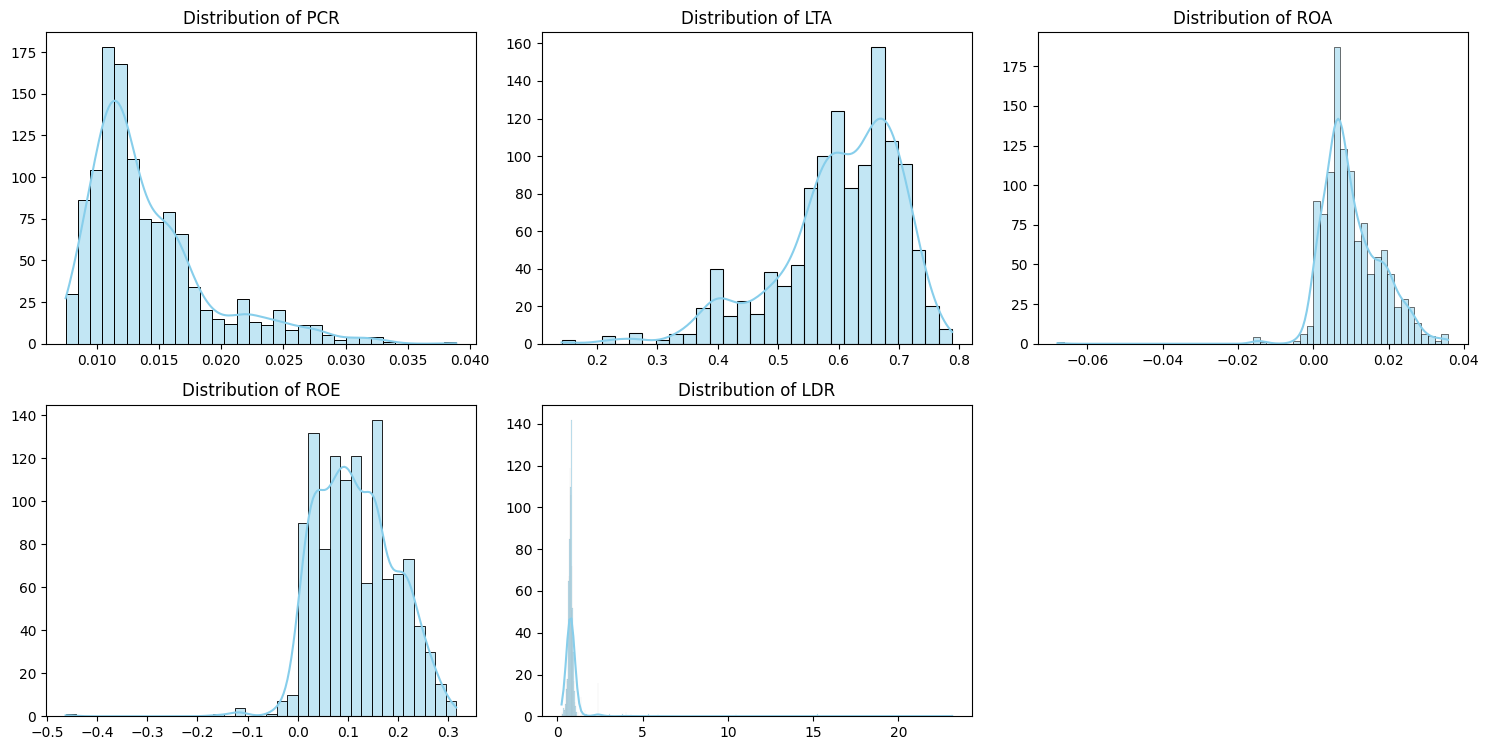

In [8]:
# Bank-level financial variables
micro_vars = ['PCR', 'LTA', 'ROA', 'ROE', 'LDR']

fig, axs = plt.subplots(2, 3, figsize=(15, 8))
axs = axs.flatten()

for i, feature in enumerate(micro_vars):
    sns.histplot(df[feature], kde=True, ax=axs[i], color='skyblue')
    axs[i].set_title(f"Distribution of {feature}")
    axs[i].set_xlabel("")
    axs[i].set_ylabel("")

# Hide unused subplots
for j in range(len(micro_vars), len(axs)):
    axs[j].set_visible(False)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

### Outliers


Outlier Detection for: LDR
Number of outliers detected: 82
IQR Thresholds — Lower: 0.488, Upper: 1.048
Sample outlier observations:


,bank,time,LDR
68,TPB,2013-03-01,0.2391
69,TPB,2013-06-01,0.2391
62,SSB,2012-12-01,0.2712
32,MSB,2014-12-01,0.3181
37,NAB,2012-06-01,0.3556


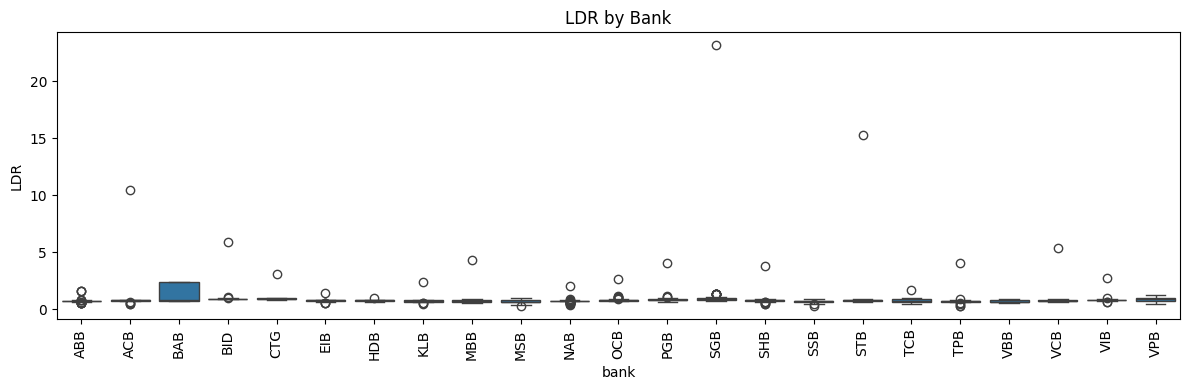


Outlier Detection for: ROE
Number of outliers detected: 6
IQR Thresholds — Lower: -0.110, Upper: 0.337
Sample outlier observations:


,bank,time,ROE
5,TPB,2013-09-01,-0.4629
0,SHB,2012-09-01,-0.1604
2,TPB,2012-09-01,-0.1179
1,TPB,2012-06-01,-0.1179
3,TPB,2013-03-01,-0.1179


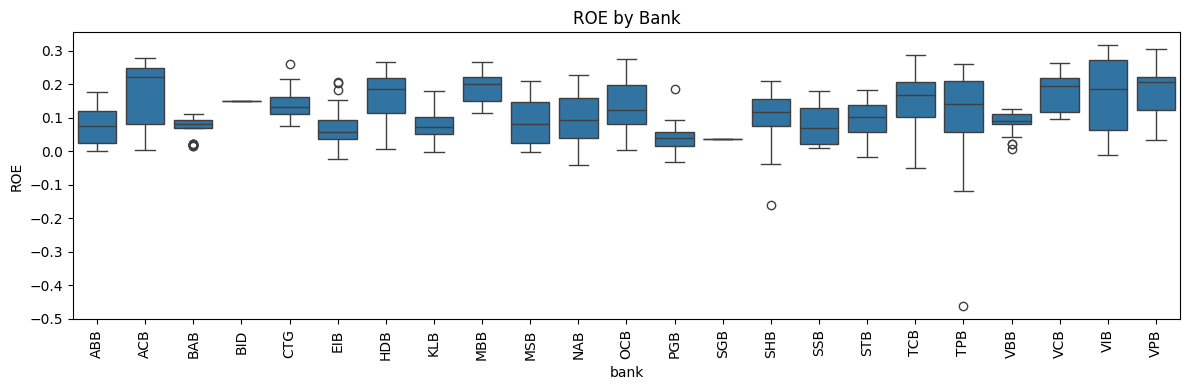


Outlier Detection for: PCR
Number of outliers detected: 74
IQR Thresholds — Lower: 0.003, Upper: 0.024
Sample outlier observations:


,bank,time,PCR
43,VCB,2016-03-01,0.0240
21,PGB,2013-09-01,0.0241
16,MBB,2021-12-01,0.0241
9,BID,2023-06-01,0.0242
30,SSB,2014-03-01,0.0242


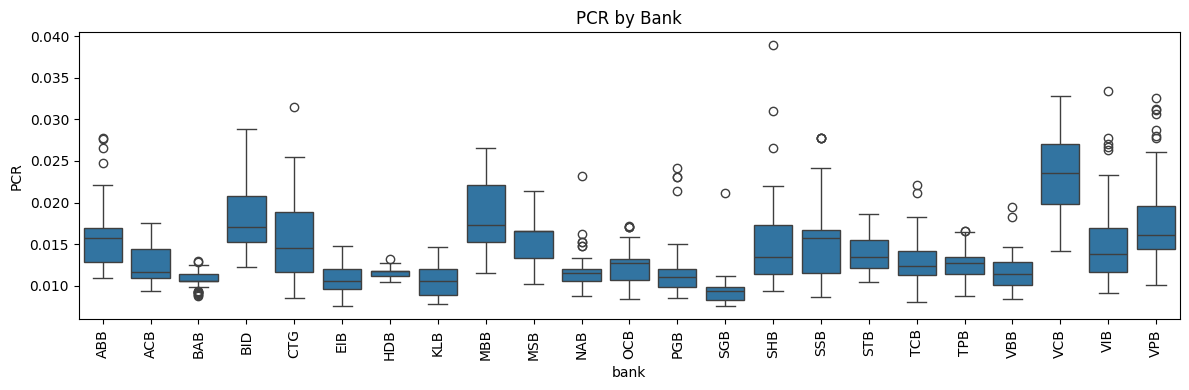

In [13]:
# Variables suspected of containing outliers
outlier_vars = ['LDR', 'ROE', 'PCR']

# Function to detect outliers using the IQR method
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower) | (df[column] > upper)]
    return outliers, lower, upper

# Loop through each variable and evaluate outliers
for var in outlier_vars:
    print(f"\nOutlier Detection for: {var}")
    outliers, lower, upper = detect_outliers_iqr(df, var)
    print(f"Number of outliers detected: {len(outliers)}")
    print(f"IQR Thresholds — Lower: {lower:.3f}, Upper: {upper:.3f}")
    
    # Access the index directly for 'bank' and 'time'
    outliers_sample = outliers.reset_index()[['bank', 'time', var]].sort_values(by=var).head(5)
    print("Sample outlier observations:")
    display(outliers_sample)

    # Boxplot by bank to visualize outliers in panel structure
    plt.figure(figsize=(12, 4))
    sns.boxplot(data=df.reset_index(), x='bank', y=var)  # Reset index for boxplot
    plt.title(f"{var} by Bank")
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

### Correlation

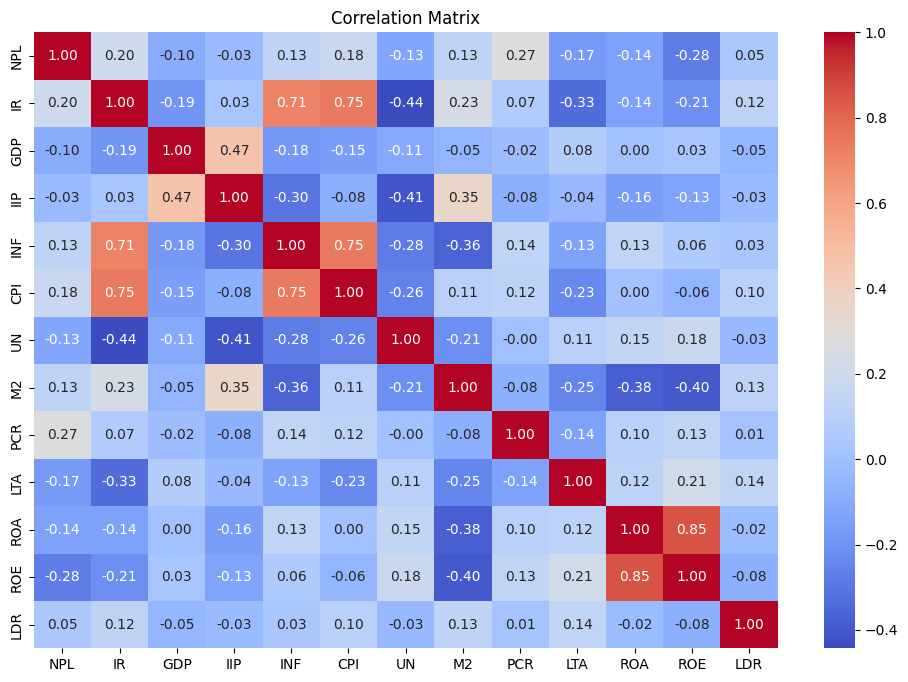

In [11]:
df_numeric = df.drop(columns=['year', 'quarterly', 'time'], errors='ignore')

corr_matrix = df_numeric.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()

In [14]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

X = df[['IR', 'GDP', 'IIP', 'INF', 'CPI', 'UN', 'M2', 'PCR', 'LTA', 'ROA', 'ROE', 'LDR']] 

# Add intercept to compute VIF
X = add_constant(X)

vif_df = pd.DataFrame()
vif_df["Variable"] = X.columns
vif_df["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

vif_df

,Variable,VIF
0,const,356.567209
1,IR,5.416406
2,GDP,1.436502
3,IIP,2.201373
4,INF,10.158238
5,CPI,3.925190
6,UN,1.774722
7,M2,3.850929
8,PCR,1.074833
9,LTA,1.307843
